# <u> Assignment 1: Filtering Drop Test Data with Pandas </u>
Using pandas, matplotlib and numpy: 
Filter data so that only the drop itself is included : Use Plot for verification

## 10 to 1 data:
Dropped 10 coffee filters stacked together, then 9, then 8 and so on...


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
ten_to_one_df = pd.read_csv('10 filters to 1 filter Data.csv')
ten_times_one_df = pd.read_csv('10 times 1 filter Data.csv')

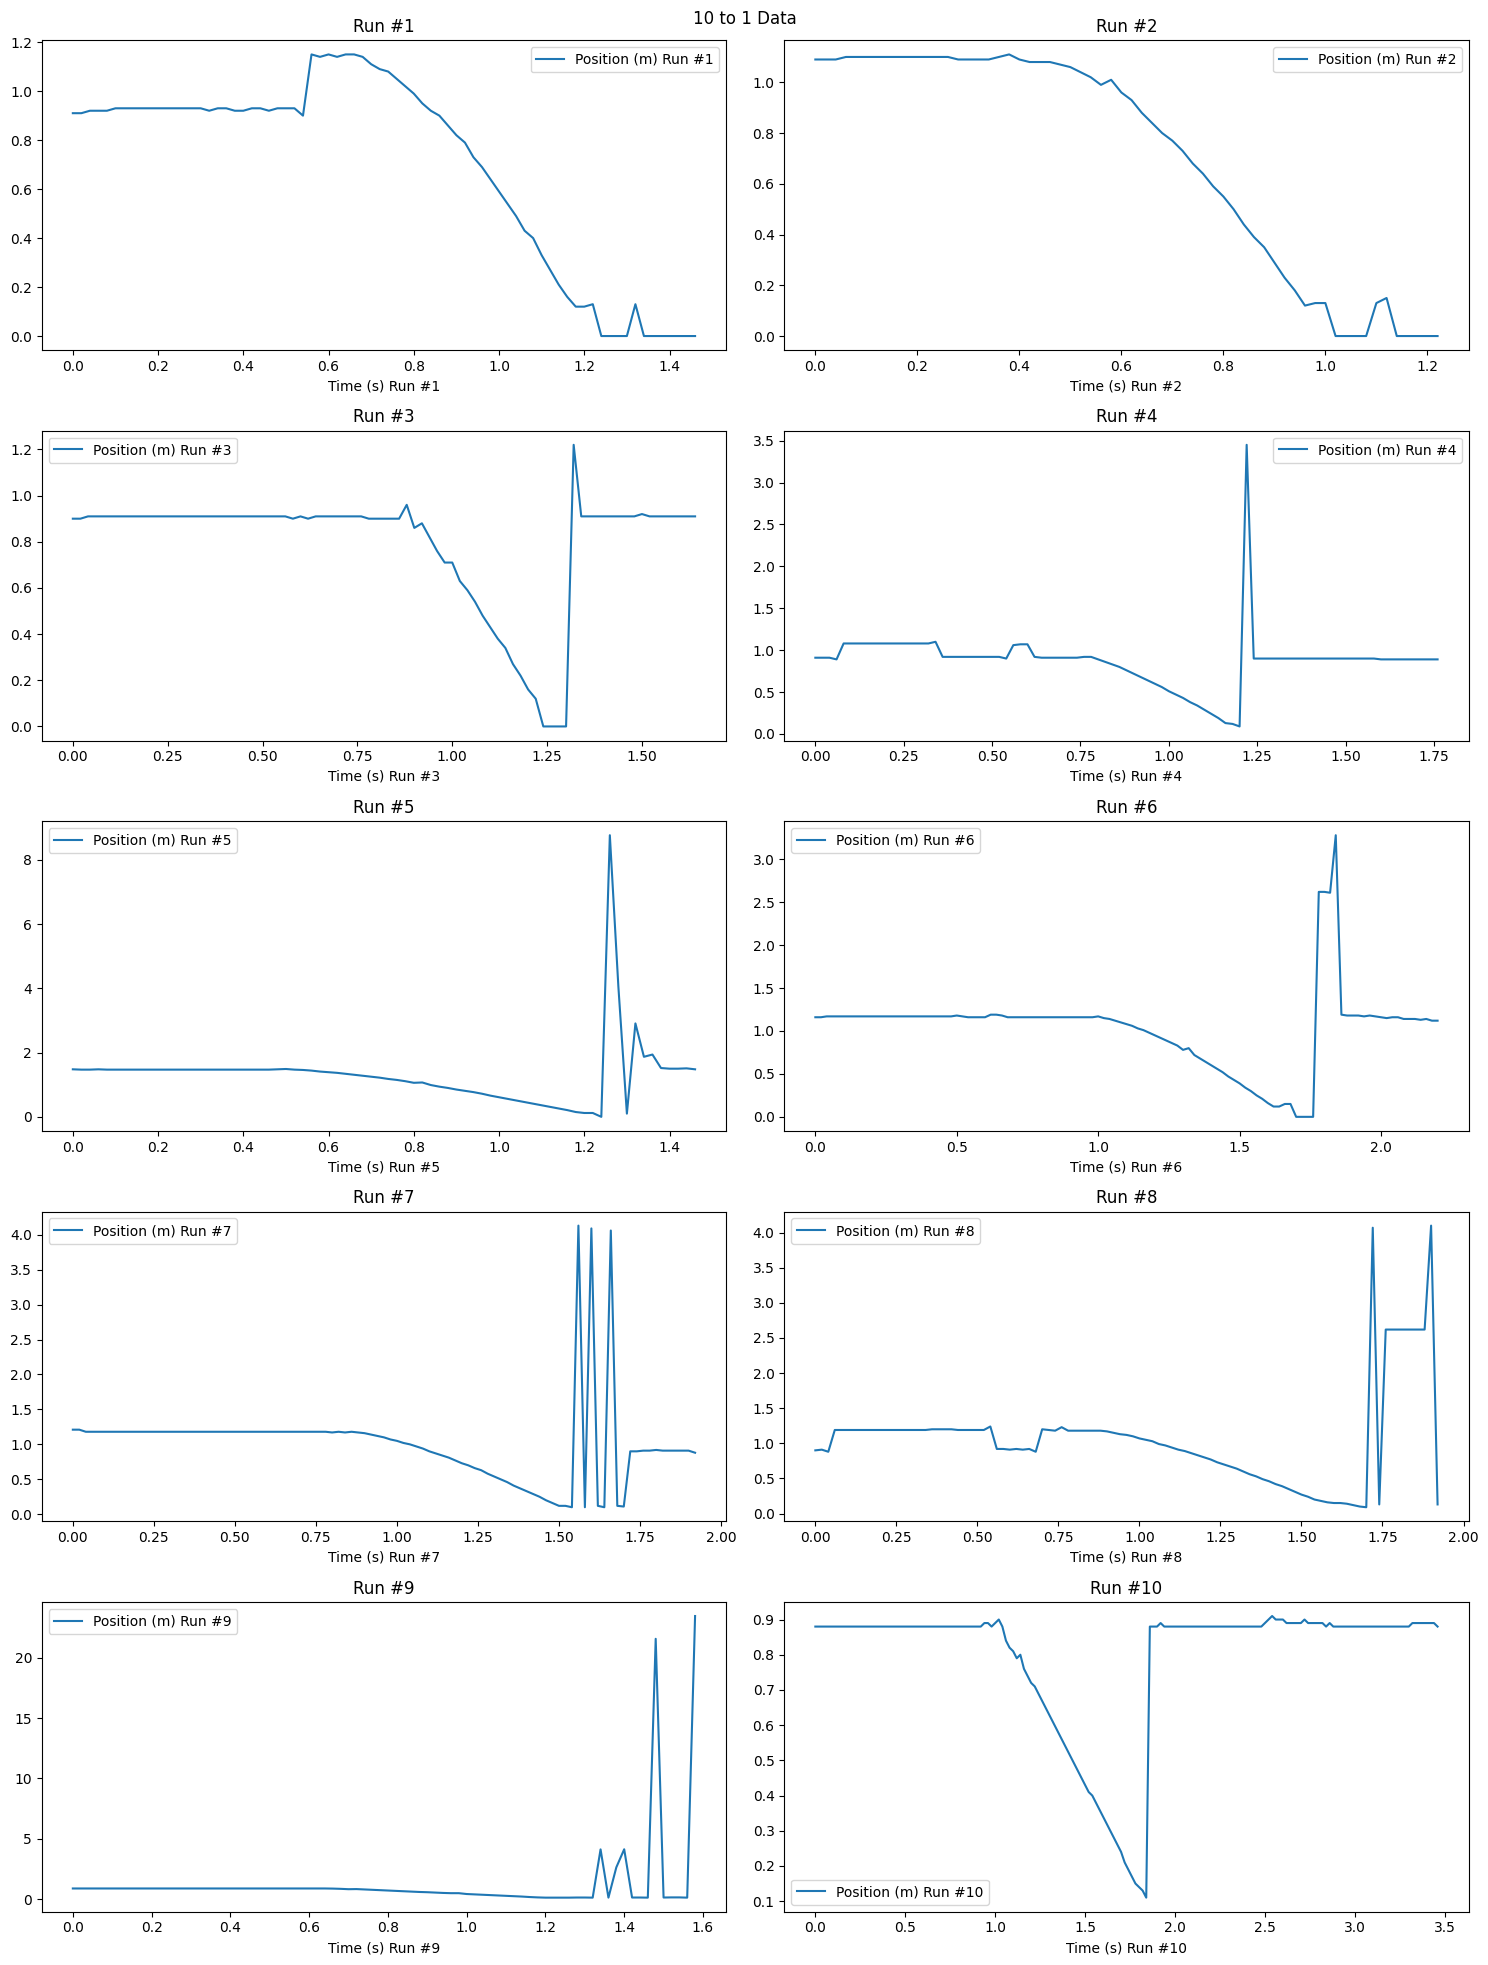

In [2]:
# Plot the initial data
fig, axs = plt.subplots(5, 2, figsize=(15, 20))
plt.suptitle('10 to 1 Data')
for i in range(10):
    ten_to_one_df.plot(x=f'Time (s) Run #{i+1}', y=f'Position (m) Run #{i+1}', ax=axs[i//2, i%2], title=f'Run #{i+1}')
plt.tight_layout()
plt.show()

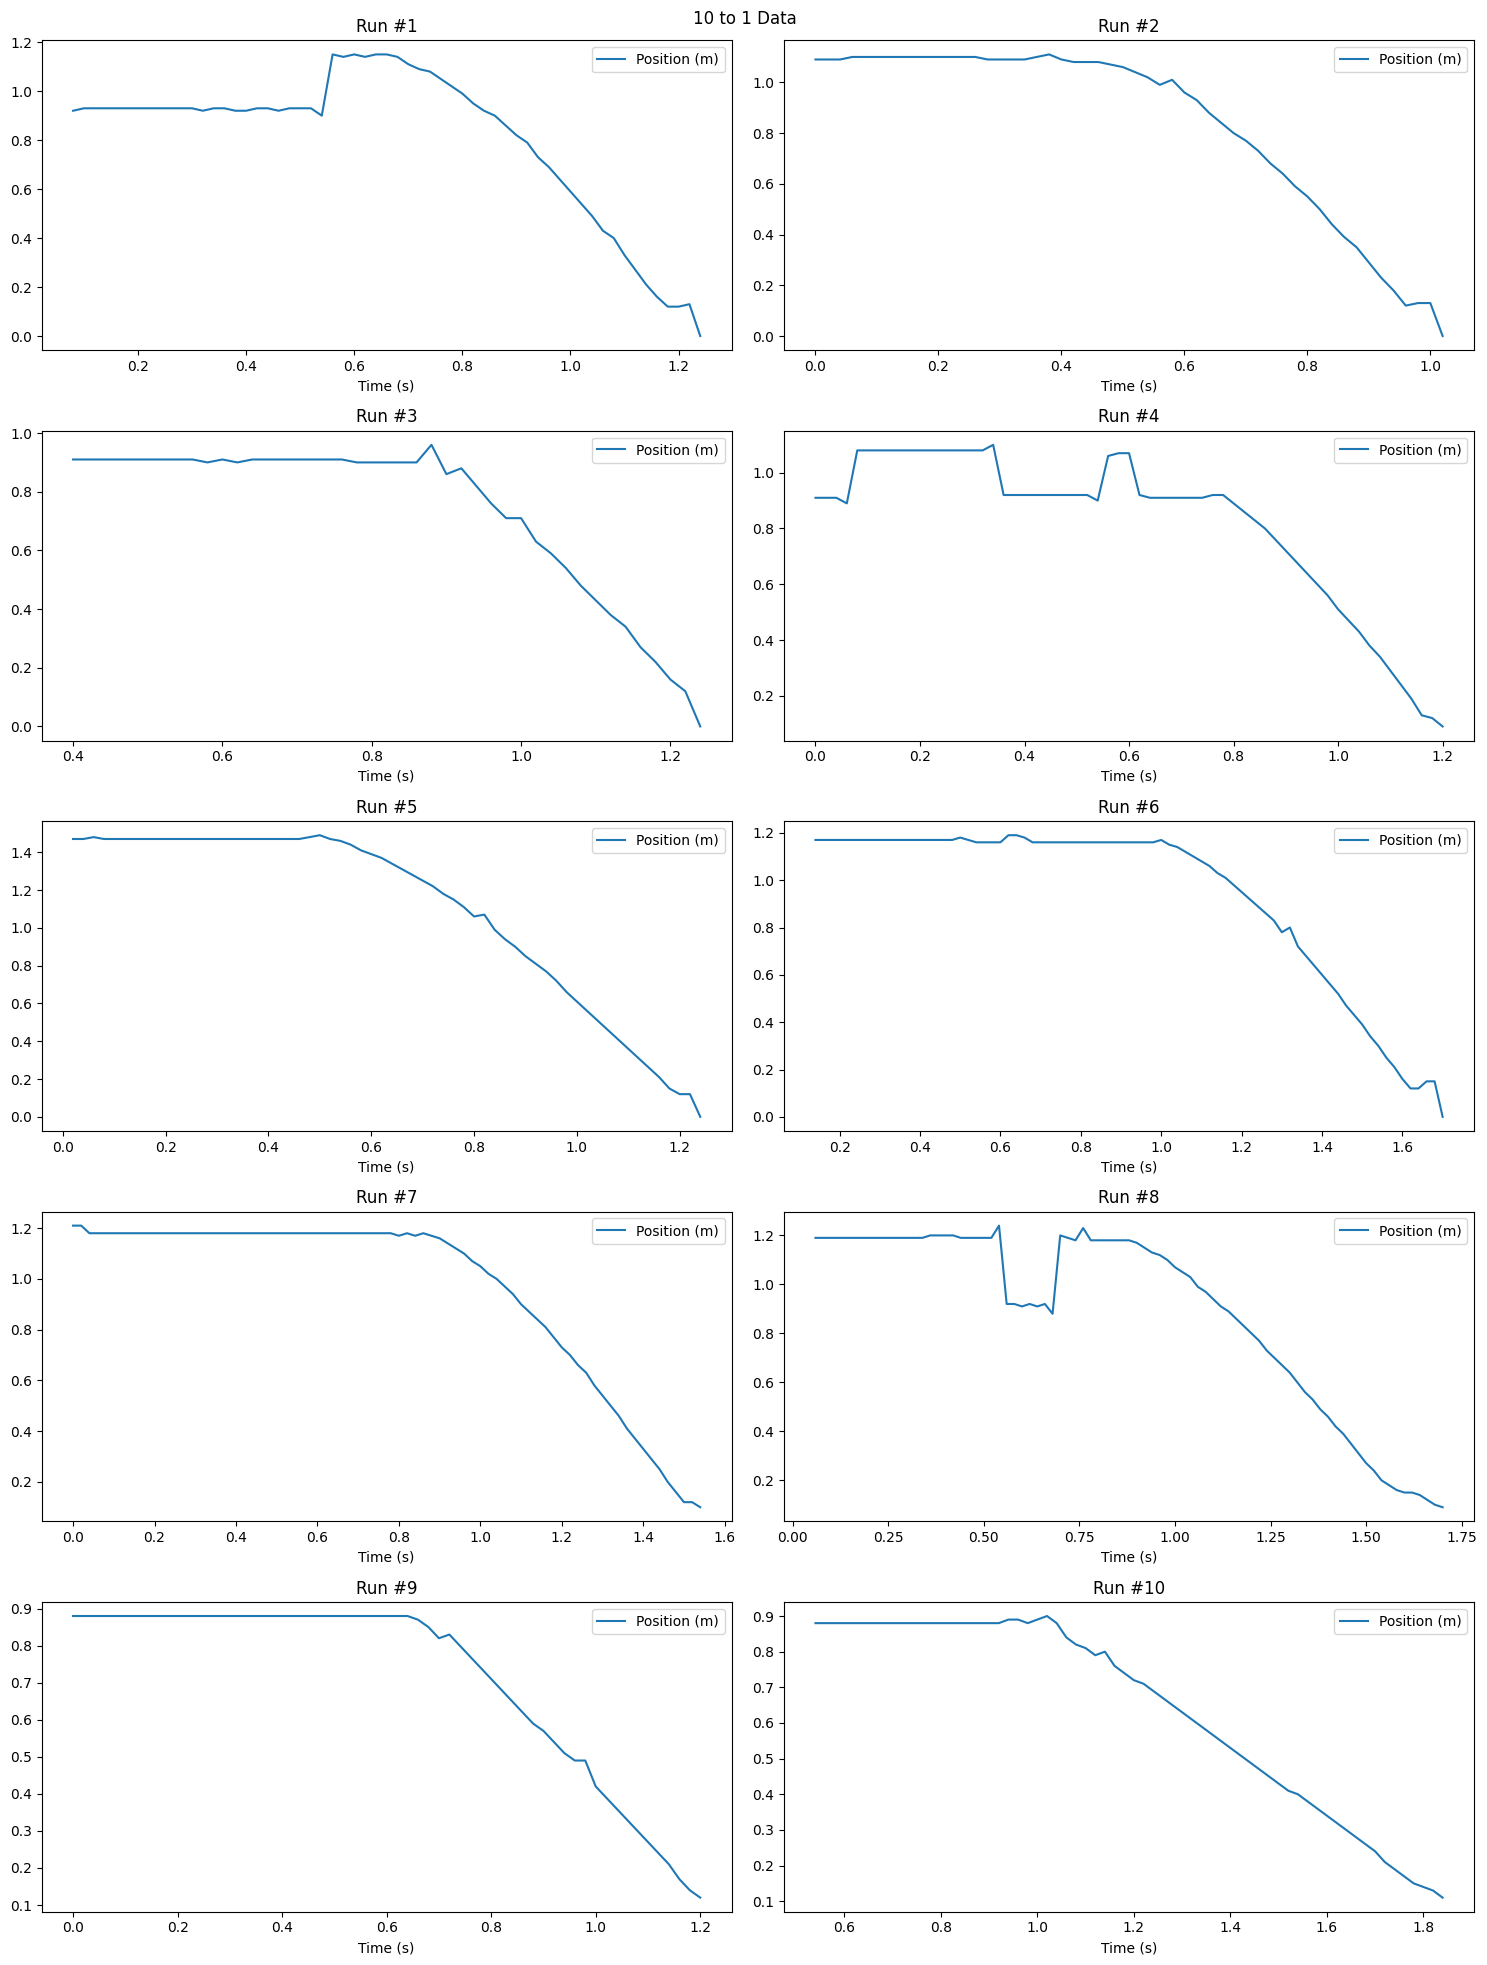

In [3]:
# filter_data: Finds min & max index, filters everything before max time - KEEP and after min index
KEEP = 0.5
def filter_data(run_df):
    min_index = run_df['Position (m)'].idxmin()
    max_index = run_df['Position (m)'][:min_index].idxmax()
    max_time = run_df['Time (s)'][max_index]
    run_df = run_df[(run_df['Time (s)'] > max_time - KEEP) & (run_df.index <= min_index)]
    return run_df

# For loop: Iterates through each run and filters the data using the filter_data function.
# Then plots the data and titles each subplot with the run number.
fig, axs = plt.subplots(5, 2, figsize=(15, 20))
plt.suptitle('10 to 1 Data')
for i in range(1, 11):
    run_df = ten_to_one_df[[f'Time (s) Run #{i}', f'Position (m) Run #{i}']].dropna()
    run_df.columns = ['Time (s)', 'Position (m)']
    run_df = filter_data(run_df)
    run_df.plot(x='Time (s)', y='Position (m)', ax=axs[(i - 1) // 2, (i - 1) % 2])
    axs[(i - 1) // 2, (i - 1) % 2].set_title(f'Run #{i}')

plt.tight_layout()
plt.show()

## 10 times 1 data:
Dropped a single coffee filter 10 times


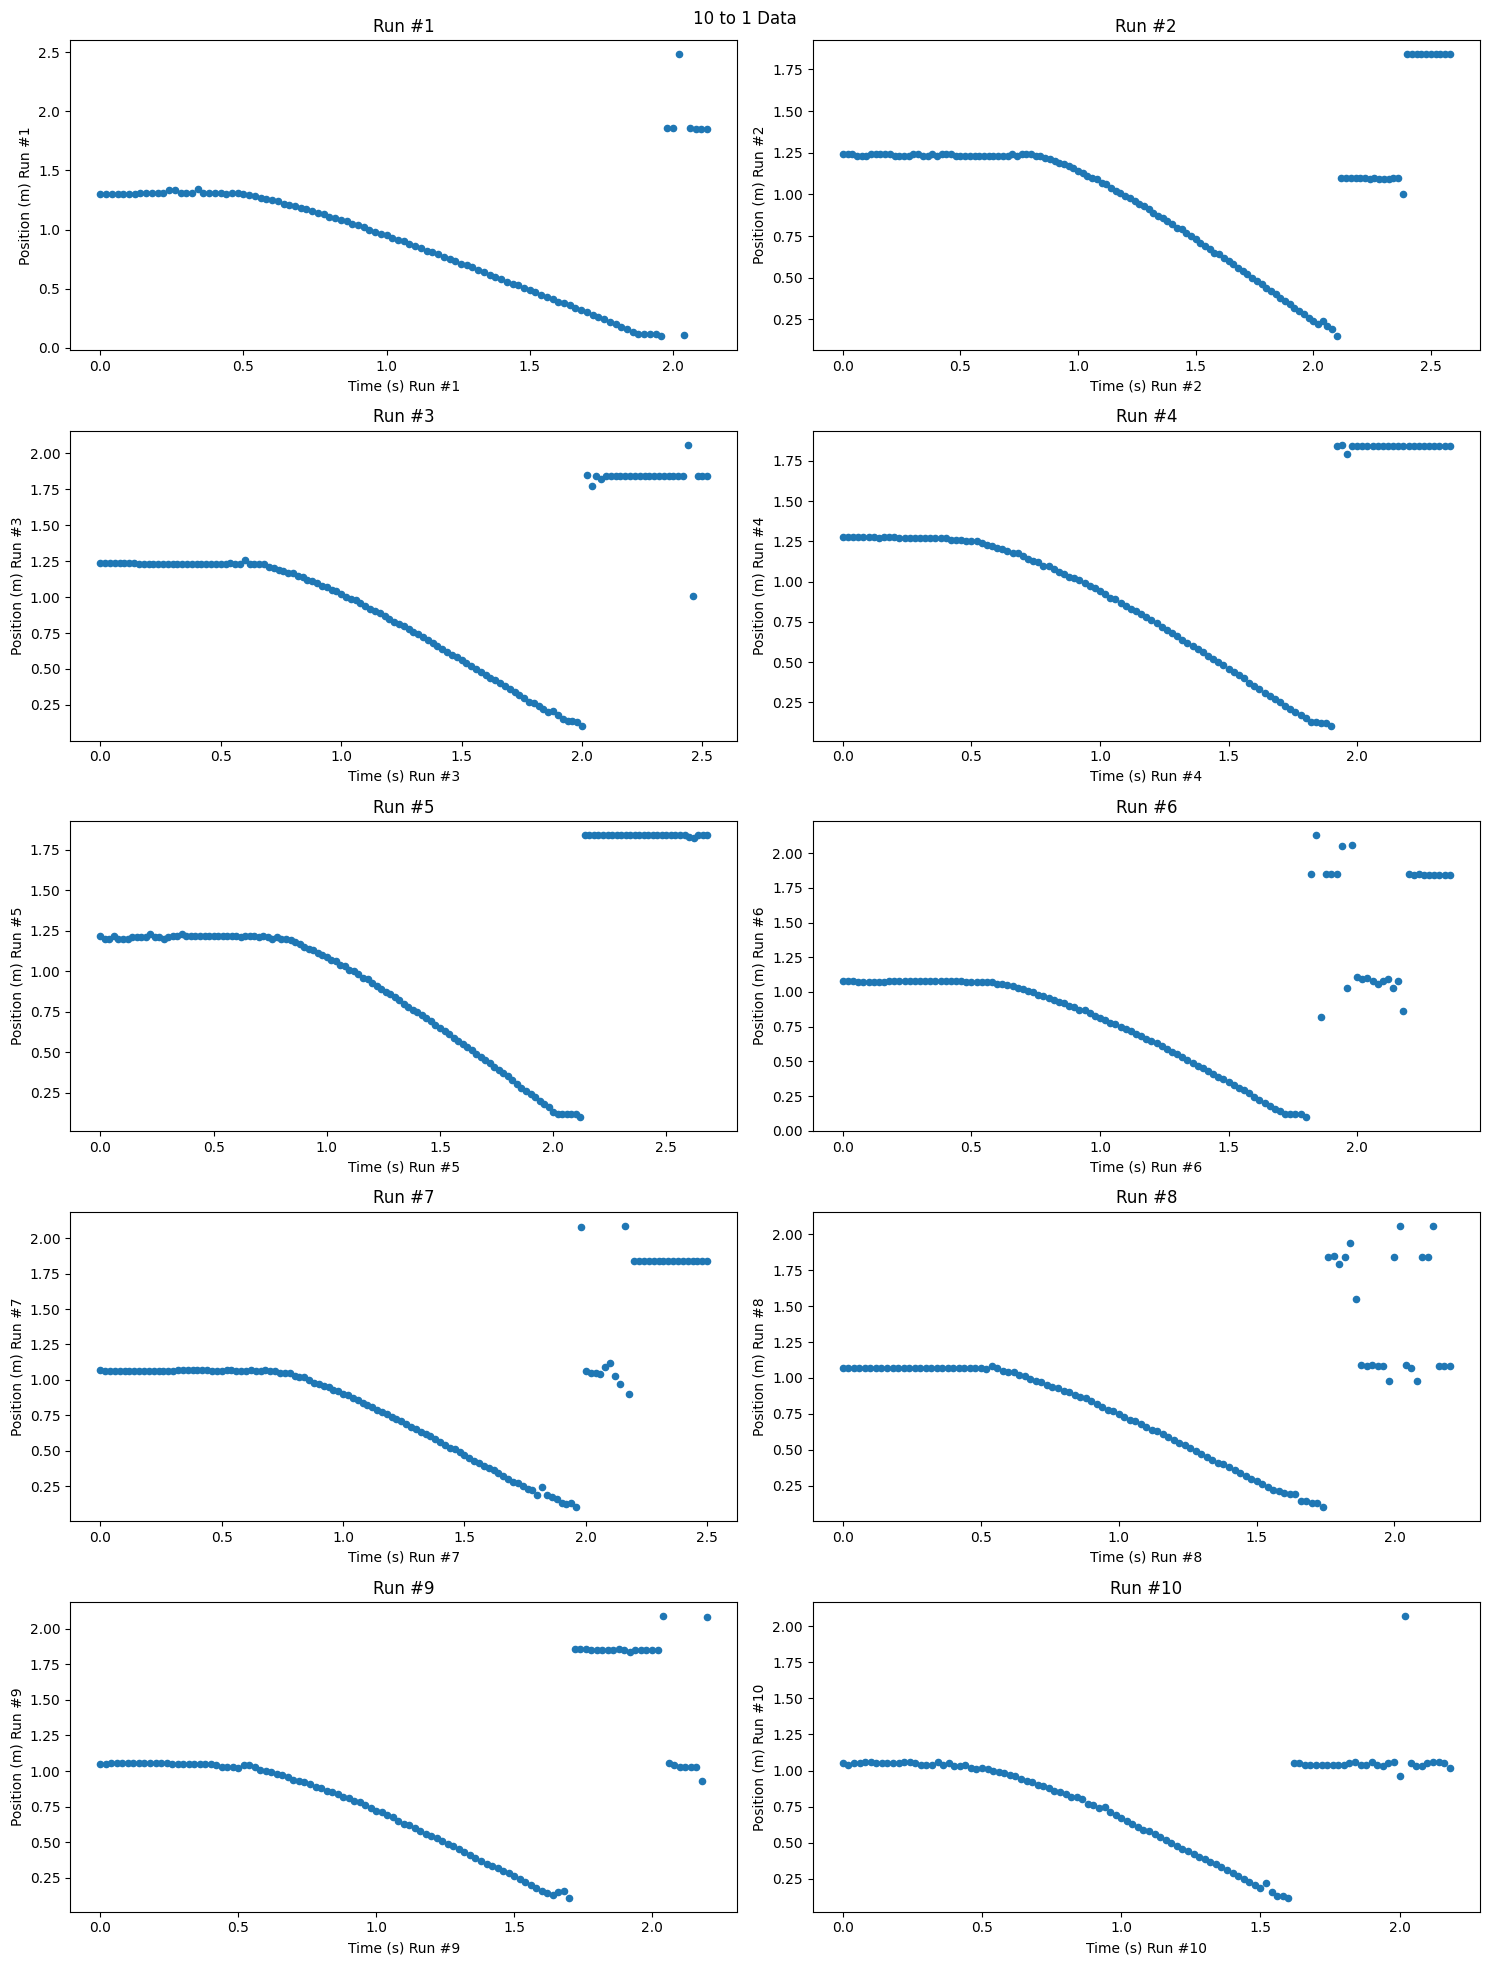

In [4]:
# Plot the initial data
fig, axs = plt.subplots(5, 2, figsize=(15, 20))
plt.suptitle('10 to 1 Data')
for i in range(10):
    ten_times_one_df.plot(kind='scatter', x=f'Time (s) Run #{i+1}', y=f'Position (m) Run #{i+1}', ax=axs[i//2, i%2], title=f'Run #{i+1}')
plt.tight_layout()
plt.show()

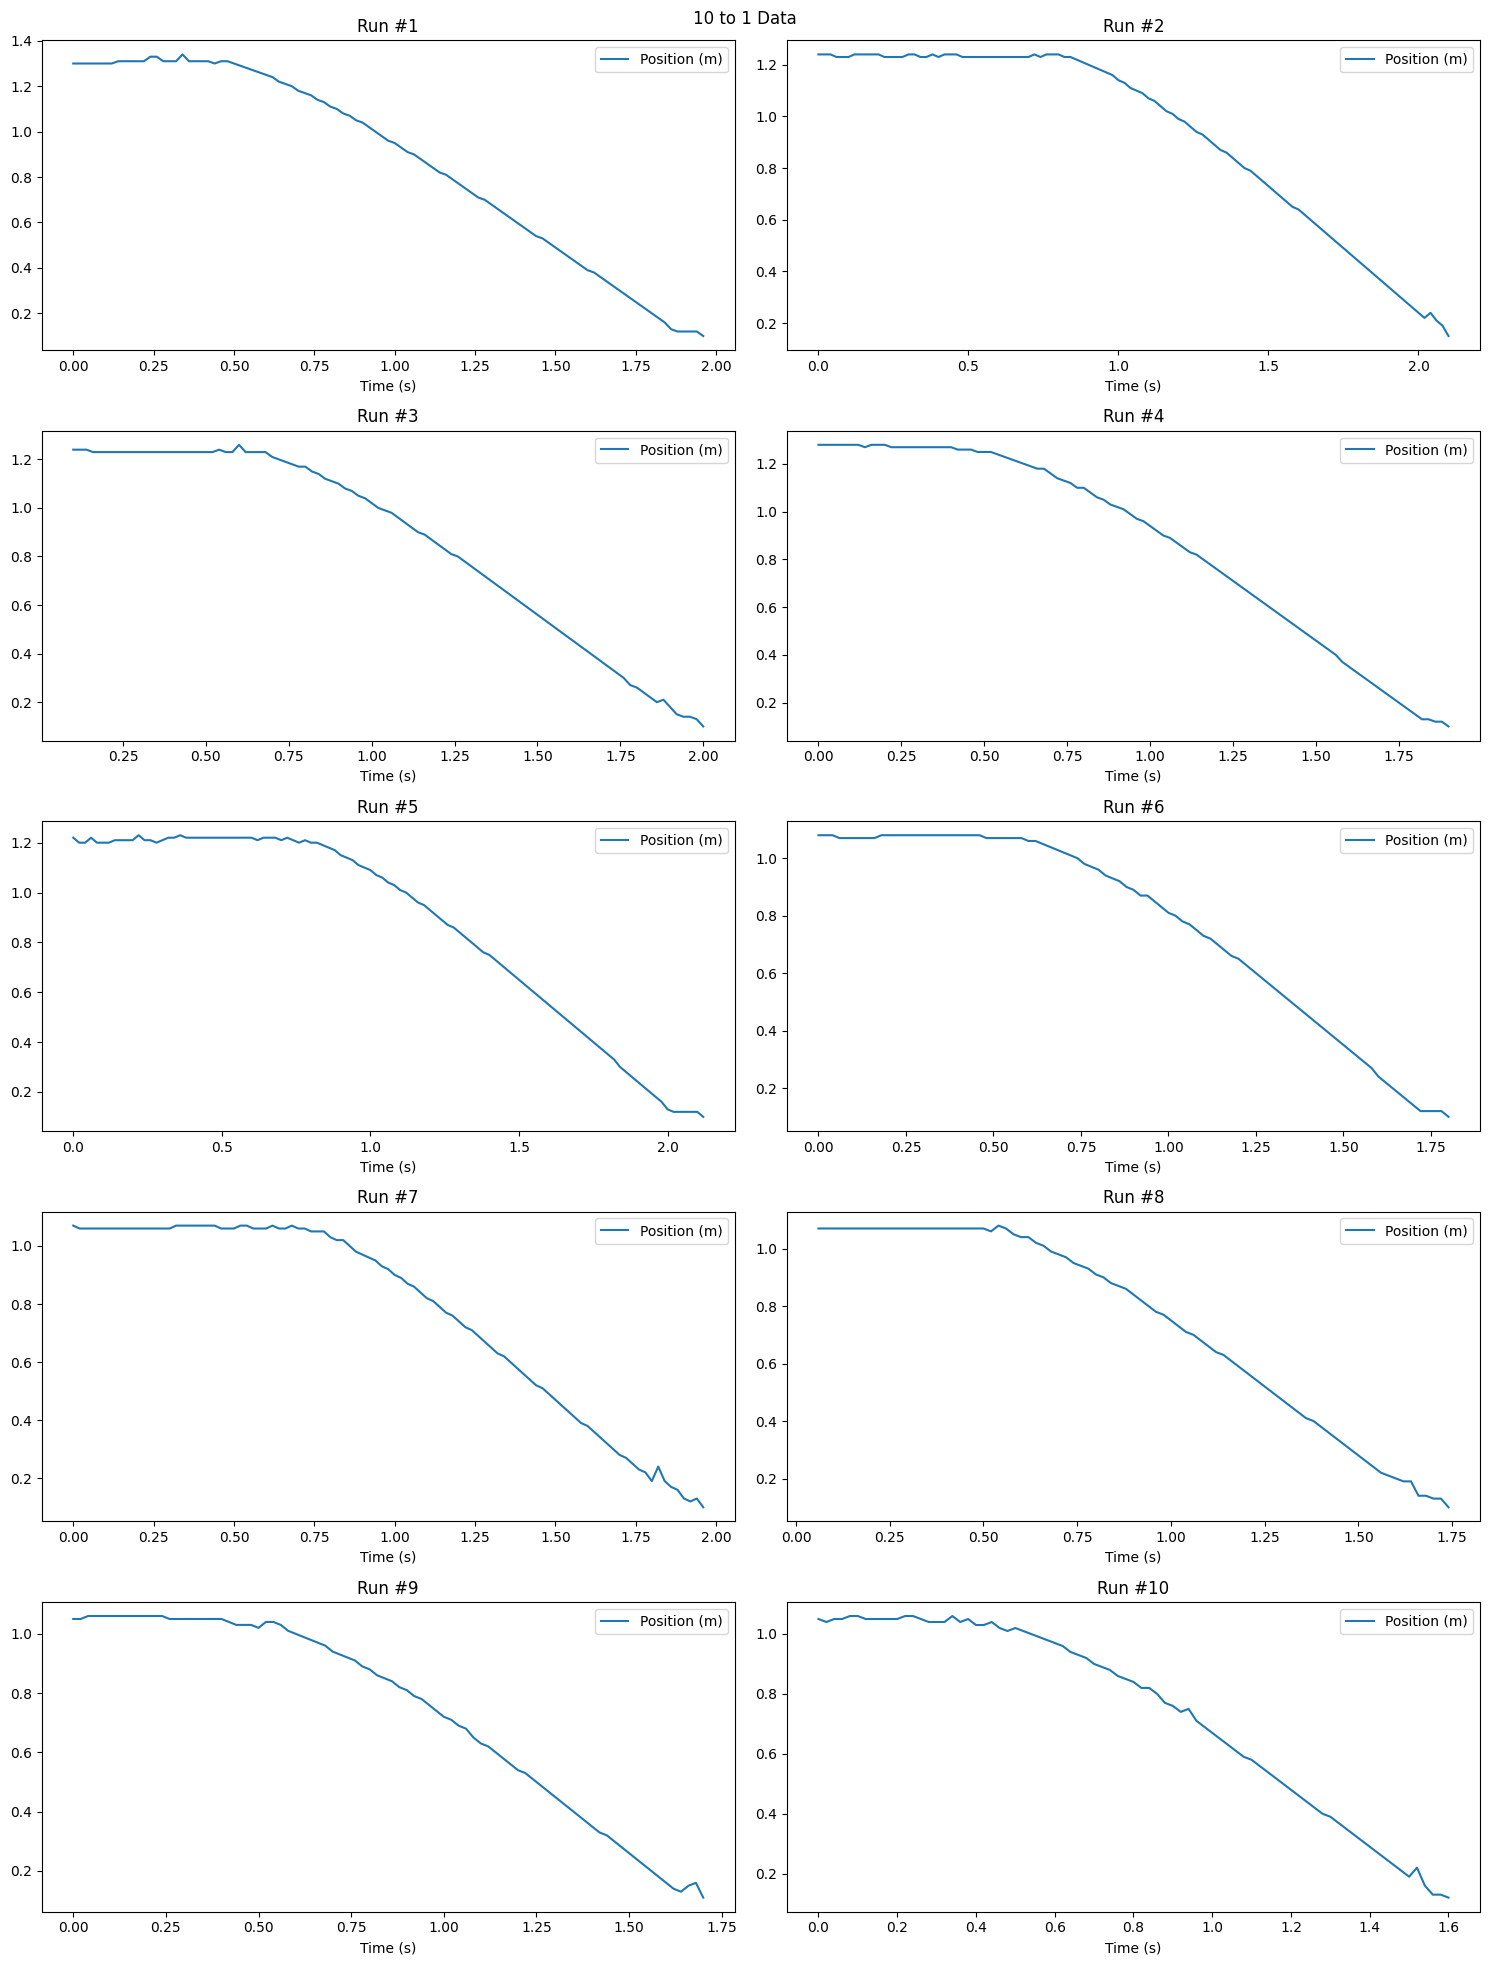

In [5]:
# filter_data: Finds min & max index, filters everything before max time - KEEP and after min index
KEEP = 0.5
def filter_data(run_df):
    min_index = run_df['Position (m)'].idxmin()
    max_index = run_df['Position (m)'][:min_index].idxmax()
    max_time = run_df['Time (s)'][max_index]
    # Only keep data from max_time - KEEP up to the minimum point
    run_df = run_df[(run_df['Time (s)'] > max_time - KEEP) & (run_df.index <= min_index)]
    return run_df

# For loop: Iterates through each run and filters the data using the filter_data function.
# Then plots the data and titles each subplot with the run number.
fig, axs = plt.subplots(5, 2, figsize=(15, 20))
plt.suptitle('10 to 1 Data')
for i in range(1, 11):
    run_df = ten_times_one_df[[f'Time (s) Run #{i}', f'Position (m) Run #{i}']].dropna()
    run_df.columns = ['Time (s)', 'Position (m)']
    run_df = filter_data(run_df)
    run_df.plot(x='Time (s)', y='Position (m)', ax=axs[(i - 1) // 2, (i - 1) % 2])
    axs[(i - 1) // 2, (i - 1) % 2].set_title(f'Run #{i}')

plt.tight_layout()
plt.show()